## Convolution
- Convolution is an element-wise multiplication of two matrices
followed by a sum.
Step to make a convolution:
    1. Take two matrices (which both have the same dimensions).
    2. Multiply them, element-by-element (i.e., not the dot product, just a simple multiplication).
    3. Sum the elements together.
 
- Image ~ Big-matrix
- Kernel/Convolutional Matrix  ~ Tiny maxtrix 
   - odd kernel (Example: 3x3) => thus the kernel can have "center pixel"

## Convolution Implemented:
Importing required Python packages

In [1]:
from skimage.exposure import rescale_intensity
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt


Defining this convolve method

In [2]:
def convolve(image, kernel):
    # Get the dimensions of the image and kernel
    (img_h, img_w) = image.shape[:2]
    (ker_h, ker_w) = kernel.shape[:2]

    # Allocate memory of the output image, ensuring to 'pad' the borders of the input image so the spacial size
    # (i.e. width and height) are not reduced
    pad = (ker_w - 1) // 2
    image = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((img_h, img_w), dtype='float')

    # Loop over the input image, 'sliding' the kernel across each (x, y) coordinate from left-to-right and
    # top-to-bottom
    for y in np.arange(pad, img_h + pad):
        for x in np.arange(pad, img_w + pad):
            # Extract the ROI of the image by extracting the 'center' region of the current (x, y) coordinates
            # dimensions
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]

            # Perform the actual convolution
            k = (roi * kernel).sum()

            # Store the convolved value in the (x, y) coordinate of the output image
            output[y - pad, x - pad] = k

    # Rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype('uint8')

    # Return the output image
    return output



- Add zero padding (Replicate padding): For ensuring the spacial size of input image are not reduced.

Next, Apply the actual convolution to our image:

In [3]:
# Construct average blurring kernels used to smooth an image
small_blur = np.ones((7, 7), dtype='float') * (1.0 / (7 * 7))
large_blur = np.ones((21, 21), dtype='float') * (1.0 / (21 * 21))


- The kernel will multiply each input pixel by a small fraction and take the sum – this is exactly the definition of the average.

Construct responsible kernel:

In [4]:
# Construct a sharpening filter
sharpen = np.array(([0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]), dtype='float')

In [5]:
# Construct the Laplacian kernel used to detect edge-like regions of an image
laplacian = np.array(([0, 1, 0],
                      [1, -4, 1],
                      [0, 1, 0]), dtype='int')

In [6]:
# The Sobel kernels can be used to detect edge-like regions along both the x and y axis, respectively:
# Construct the Sobel x-axis kernel
sobel_x = np.array(([-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]), dtype='int')

# Construct the Sobel y-axis kernel
sobel_y = np.array(([-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]), dtype='int')

In [7]:
# Construct an emboss kernel
emboss = np.array(([-2, -1, 0],
                   [-1, 1, 1],
                   [0, 1, 2]), dtype='int')

In [8]:
# Construct a kernel bank, a list of kernels to be applied using out custom 'convolve' function and OpenCV's
# 'filter2D' function
kernel_bank = (('small_blur', small_blur),
               ('large_blur', large_blur),
               ('sharpen', sharpen),
               ('laplacian', laplacian),
               ('sobel_x', sobel_x),
               ('sobel_y', sobel_y),
               ('emboss', emboss))

- Constructing this list of kernels enables use to loop over them and visualize their output in an
efficient manner.

In [9]:
# Load the image and convert it to greyscale
image = cv2.imread("jemma.png")
grey = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
grey.shape
# plt.imshow(grey, cmap='gray', interpolation='none')



(500, 375)

[INFO]: Applying small_blur kernel


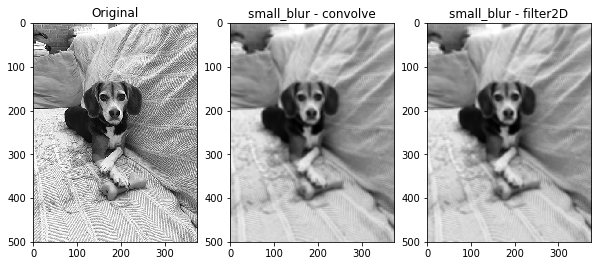

[INFO]: Applying large_blur kernel


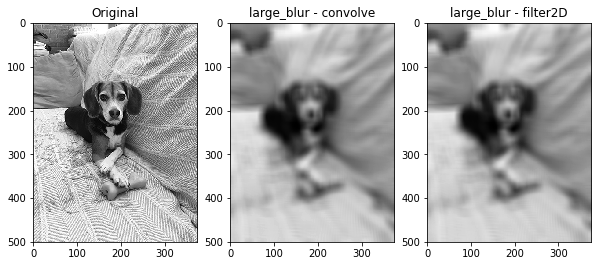

[INFO]: Applying sharpen kernel


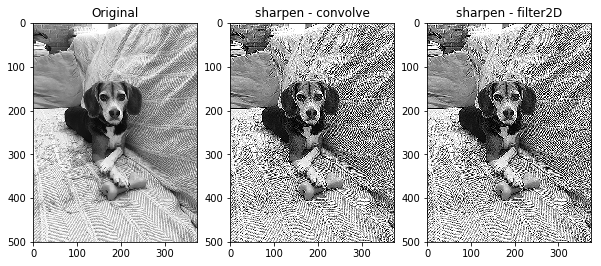

[INFO]: Applying laplacian kernel


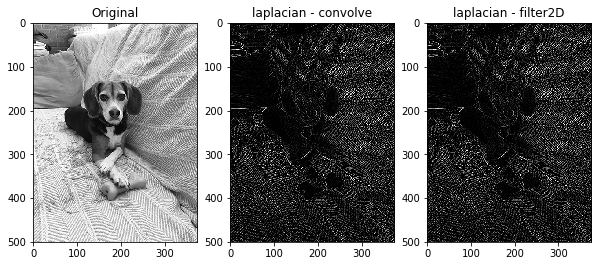

[INFO]: Applying sobel_x kernel


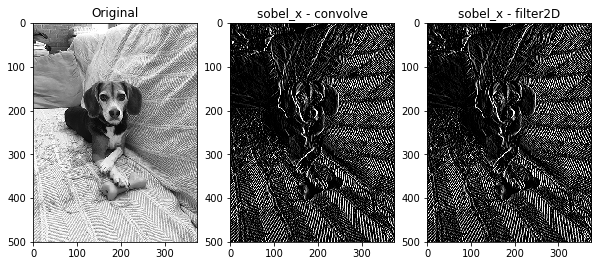

[INFO]: Applying sobel_y kernel


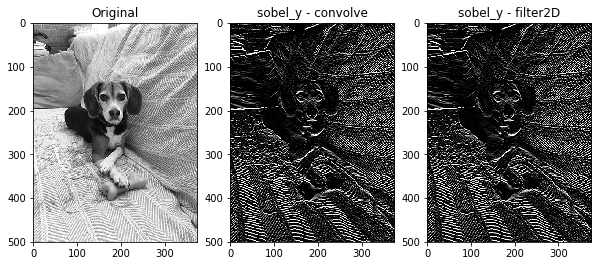

[INFO]: Applying emboss kernel


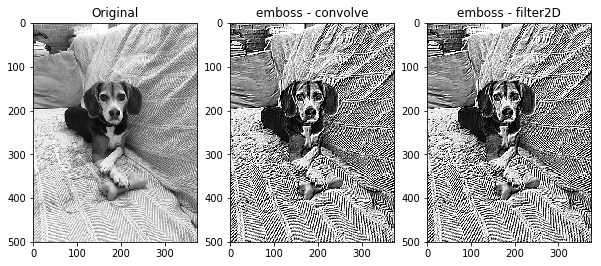

In [10]:
# Loop over the kernels
for (kernel_name, kernel) in kernel_bank:
    # Apply the kernel to the greyscale image using both 'convolve' functions
    print('[INFO]: Applying {} kernel'.format(kernel_name))
    convolve_output = convolve(grey, kernel)
    opencv_output = cv2.filter2D(grey, -1, kernel)
    # Show the output image
    plt.figure(figsize=(10, 7))

    plt.subplot(1,3,1)
    plt.imshow(grey, cmap='gray', interpolation='none')
    plt.title('Original')
    
    plt.subplot(1,3,2)
    plt.imshow(convolve_output, cmap='gray', interpolation='none')
    plt.title('{} - convolve'.format(kernel_name))

    plt.subplot(1,3,3)
    plt.imshow(opencv_output, cmap='gray', interpolation='none')
    plt.title('{} - filter2D'.format(kernel_name))
    plt.show()

